# Project Title:
## "Sentiment Analysis of Tweets on Apple and Google Products"

## 1. Introduction
## Background
Social media platforms like Twitter are rich in user opinions.

Apple and Google dominate the tech space — understanding public sentiment is valuable for marketing, product design, and reputation management.

## Problem Statement
Automatically classify tweets about Apple and Google as positive, negative, or neutral.

Provide insights into customer perception.

## Goal
Build an NLP model that classifies tweet sentiment.

Start with binary classification (positive/negative), then move to multiclass (positive/neutral/negative).



In [37]:
import pandas as pd

# Load data
df = pd.read_csv('../data/tweet_product_company.csv', encoding='ISO-8859-1')

# Quick look
df.head()
df.info()
#df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [38]:
df = df.rename(columns={
    'tweet_text': 'text',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment',
    'emotion_in_tweet_is_directed_at': 'brand'
})
df = df[['text', 'sentiment', 'brand']]

In [39]:
df.head(10)

,text,sentiment,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,iPhone
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,iPad or iPhone App
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,iPad
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,iPad or iPhone App
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,Google
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product,NaN
6,NaN,No emotion toward brand or product,NaN
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion,Android
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion,iPad or iPhone App
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion,Apple


In [40]:
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [41]:
class Animal:  # Base class
    def __init__(self, name):
        self.name = name

    def speak(self):
        return "Some sound"

class Dog(Animal):  # Inherited class
    def speak(self):
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow"
class cow(Animal):
    def speak(self):
        return "Moo"

dog = Dog("Rex")
cat = Cat("Whiskers")
cow = cow("Bessie")

print(dog.name, dog.speak())  # Rex Woof!
print(cat.name, cat.speak())  # Whiskers Meow
print(cow.name, cow.speak())  # Bessie Moo


Rex Woof!
Whiskers Meow
Bessie Moo


In [42]:
class DataCleaner:
    def __init__(self, df):
      self.df = df.copy()
    def fill_missing_values(self):
        # fill brnd with most common value
        most_common_brand = self.df['brand'].mode()[0]
        self.df['brand'].fillna(most_common_brand, inplace=True)
    def remove_duplicates(self):
        # remove duplicates
        self.df.drop_duplicates(inplace=True)
    #def lowercase_columns(self):
        #self.df.columns = [col.lower().strip() for col in self.df.columns]
        #return self
    def clean_text(self):
        # removve mentons , urls,hashtag symbol,punctuation and digits
        self.df['text'] = self.df['text'].str.replace(r'@\w+', '', regex=True)# Remove mentions
        self.df['text'] = self.df['text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)  # Remove URLs
        self.df['text'] = self.df['text'].str.replace(r'#\w+', '', regex=True) # Remove hashtags
       # self.df['text'] = self.df['text'].str.replace(r'\d+', '', regex=True) # Remove digits
        self.df['text'] = self.df['text'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation  
        #lowercase the text   
        self.df['text'] = self.df['text'].str.lower()  # Convert to lowercase
        # Remove leading and trailing whitespace
        self.df['text'] = self.df['text'].str.strip()  # Remove leading and trailing whitespace
        # Remove extra spaces
        self.df['text'] = self.df['text'].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
        # Remove empty strings
        self.df = self.df[self.df['text'] != '']
        # Remove rows with empty text
        self.df = self.df[self.df['text'].notna()]

    def get_cleaned_data(self):
        return self.df  
cleaner = DataCleaner(df)
cleaner.fill_missing_values()
cleaner.remove_duplicates()
#cleaner.lowercase_columns()
# new column cleaned_text
df['cleaned_text']=cleaner.clean_text()
cleaned_df = cleaner.get_cleaned_data()
print(cleaned_df.head())


C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_11060\3349746528.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['brand'].fillna(most_common_brand, inplace=True)


                                                text         sentiment  \
0  i have a 3g iphone after 3 hrs tweeting at it ...  Negative emotion   
1  know about awesome ipadiphone app that youll l...  Positive emotion   
2  can not wait for 2 also they should sale them ...  Positive emotion   
3  i hope this years festival isnt as crashy as t...  Negative emotion   
4  great stuff on fri marissa mayer google tim or...  Positive emotion   

                brand  
0              iPhone  
1  iPad or iPhone App  
2                iPad  
3  iPad or iPhone App  
4              Google  


In [43]:
cleaned_df.head()

,text,sentiment,brand
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google


In [44]:
cleaned_df.isna().sum()  # Check for missing values

text         0
sentiment    0
brand        0
dtype: int64

In [45]:
# tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
cleaned_df['tokenized_text'] = cleaned_df['text'].apply(word_tokenize)
# Check the first few rows after tokenization
cleaned_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hezronkatila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,sentiment,brand,tokenized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone,"[i, have, a, 3g, iphone, after, 3, hrs, tweeti..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App,"[know, about, awesome, ipadiphone, app, that, ..."
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad,"[can, not, wait, for, 2, also, they, should, s..."
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App,"[i, hope, this, years, festival, isnt, as, cra..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, on, fri, marissa, mayer, google..."


In [46]:
#stopwords removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
cleaned_df['tokenized_text'] = cleaned_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stopwords])
# Check the first few rows after stopwords removal
cleaned_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hezronkatila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,brand,tokenized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone,"[3g, iphone, 3, hrs, tweeting, dead, need, upg..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App,"[know, awesome, ipadiphone, app, youll, likely..."
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad,"[wait, 2, also, sale]"
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App,"[hope, years, festival, isnt, crashy, years, i..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti..."


In [47]:
#lammatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_df['lemmatized_text'] = cleaned_df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# Check the first few rows after lemmatization
cleaned_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hezronkatila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,brand,tokenized_text,lemmatized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...","[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad,"[wait, 2, also, sale]","[wait, 2, also, sale]"
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


In [48]:
#count tweet by sentiment class
sentiment_counts = cleaned_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
No emotion toward brand or product    5373
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64


In [49]:
# •	Tweet length distribution
cleaned_df['tweet_length']=cleaned_df['text'].apply(lambda x: len(x.split()))
# Check the first few rows after tweet length calculation
cleaned_df.head()

,text,sentiment,brand,tokenized_text,lemmatized_text,tweet_length
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...","[3g, iphone, 3, hr, tweeting, dead, need, upgr...",20
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely...",18
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad,"[wait, 2, also, sale]","[wait, 2, also, sale]",12
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph...",13
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti...",15


In [50]:
#most frequent words
from collections import Counter
import matplotlib.pyplot as plt
# Count the frequency of each word in the lemmatized text
all_words = [word for sublist in cleaned_df['lemmatized_text'] for word in sublist]
word_counts = Counter(all_words)    


In [51]:
#join token
cleaned_df['Document'] = cleaned_df['lemmatized_text'].apply(lambda x: ' '.join(x))
# Check the first few rows after joining tokens
cleaned_df.head()

,text,sentiment,brand,tokenized_text,lemmatized_text,tweet_length,Document
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,iPhone,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...","[3g, iphone, 3, hr, tweeting, dead, need, upgr...",20,3g iphone 3 hr tweeting dead need upgrade plug...
1,know about awesome ipadiphone app that youll l...,Positive emotion,iPad or iPhone App,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely...",18,know awesome ipadiphone app youll likely appre...
2,can not wait for 2 also they should sale them ...,Positive emotion,iPad,"[wait, 2, also, sale]","[wait, 2, also, sale]",12,wait 2 also sale
3,i hope this years festival isnt as crashy as t...,Negative emotion,iPad or iPhone App,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph...",13,hope year festival isnt crashy year iphone app
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti...",15,great stuff fri marissa mayer google tim oreil...


In [59]:
# visualize most frequent words
most_common_words = word_counts.most_common(10) 
most_common_words
#plotting the most common words


[('link', 4281),
 ('rt', 2939),
 ('google', 2191),
 ('ipad', 2147),
 ('apple', 1825),
 ('store', 1501),
 ('iphone', 1246),
 ('2', 1143),
 ('new', 1081),
 ('austin', 848)]

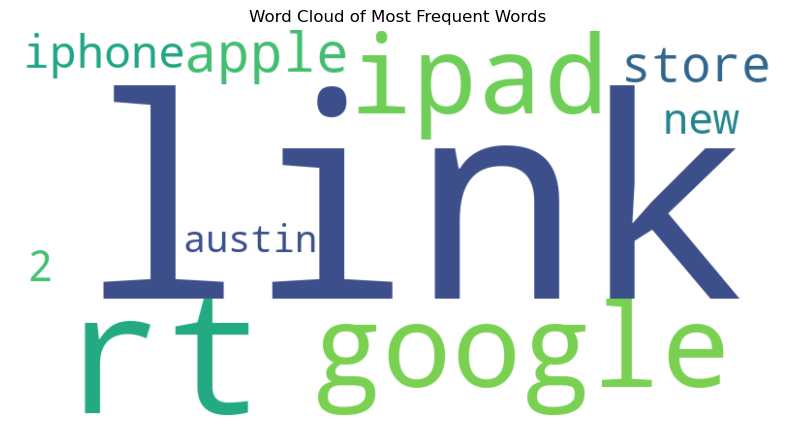

In [58]:
#•	WordClouds
from wordcloud import WordCloud
# Generate a word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))   
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

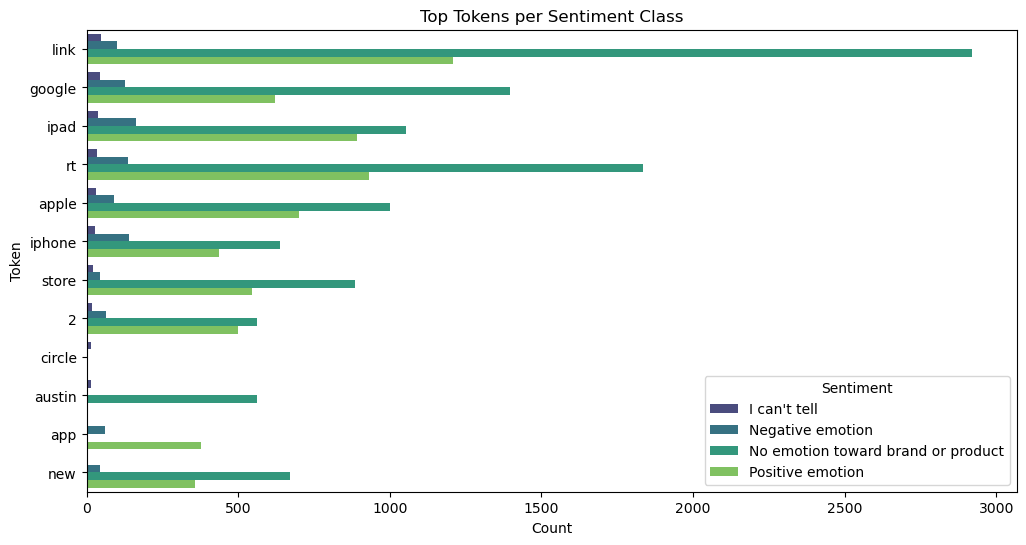

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the top tokens per sentiment class
top_tokens = cleaned_df.groupby('sentiment')['lemmatized_text'].apply(lambda x: [word for sublist in x for word in sublist]).reset_index()
top_tokens['top_tokens'] = top_tokens['lemmatized_text'].apply(lambda x: Counter(x).most_common(10))
top_tokens = top_tokens.explode('top_tokens')
top_tokens[['token', 'count']] = pd.DataFrame(top_tokens['top_tokens'].tolist(), index=top_tokens.index)
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='token', hue='sentiment', data=top_tokens, palette='viridis')
plt.title('Top Tokens per Sentiment Class')
plt.xlabel('Count')
plt.ylabel('Token')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizor = TfidfVectorizer()
# Fit and transform the 'Document' column
X = vectorizor.fit_transform(cleaned_df['Document'])
# Check the shape of the resulting matrix
print(X.shape)
#	Bar plots for top tokens per class



(9068, 8958)
